In [ ]:
#| include: false
#| default_exp ml
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
#%load_ext autoreload
#%autoreload 2

In [ ]:
#| export
from glycowork.ml.models import *
from glycowork.ml.inference import *
from glycowork.ml.processing import *
from glycowork.ml.model_training import *
from glycowork.ml.train_test_split import *
from glycowork.glycan_data.loader import df_species, df_glycan

`ml` contains the code base to process glycan for machine learning, construct state-of-the-art machine learning models, train them, and analyze trained models + glycan representations. It currently contains the following modules:

- `model_training` contains functions for training machine learning models
- `models` describes some examples for machine learning architectures applicable to glycans
- `processing` contains helper functions to prepare glycan data for model training
- `inference` can be used to analyze trained models, make predictions, or obtain glycan representations
- `train_test_split` contains various data split functions to get appropriate training and test sets

## model_training
>contains functions for training machine learning models

In [ ]:
show_doc(EarlyStopping)

---

### EarlyStopping

```python

def EarlyStopping(
    patience:int=7, # epochs to wait after last improvement
    verbose:bool=False, # whether to print messages
)->None:


```

*Early stops the training if validation loss doesn't improve after a given patience*

In [ ]:
show_doc(train_model)

---

### train_model

```python

def train_model(
    model:Module, # graph neural network for analyzing glycans
    dataloaders:dict, # dict with 'train' and 'val' loaders
    criterion:Module, # PyTorch loss function
    optimizer:Optimizer, # PyTorch optimizer, has to be SAM if mode != "regression"
    scheduler:LRScheduler, # PyTorch learning rate decay
    num_epochs:int=25, # number of epochs for training
    patience:int=50, # epochs without improvement until early stop
    mode:str='classification', # 'classification', 'multilabel', or 'regression'
    mode2:str='multi', # 'multi' or 'binary' classification
    return_metrics:bool=False, # whether to return metrics
)->torch.nn.modules.module.Module | tuple[torch.nn.modules.module.Module, dict[str, dict[str, list[float]]]]: # best model from training and the training and validation metrics


```

*trains a deep learning model on predicting glycan properties*

In [ ]:
show_doc(training_setup)

---

### training_setup

```python

def training_setup(
    model:Module, # graph neural network for analyzing glycans
    lr:float, # learning rate
    lr_patience:int=4, # epochs before reducing learning rate
    factor:float=0.2, # factor to multiply lr on reduction
    weight_decay:float=0.0001, # regularization parameter
    mode:str='multiclass', # type of prediction task
    num_classes:int=2, # number of classes for classification
    gsam_alpha:float=0.0, # if >0, uses GSAM instead of SAM optimizer
    warmup_epochs:int=5, # if >0, uses a learning rate warm-up schedule for training stability
)->tuple: # optimizer, scheduler, criterion


```

*prepares optimizer, learning rate scheduler, and loss criterion for model training*

In [ ]:
show_doc(train_ml_model)

---

### train_ml_model

```python

def train_ml_model(
    X_train:pandas.core.frame.DataFrame | list, # training data/glycans
    X_test:pandas.core.frame.DataFrame | list, # test data/glycans
    y_train:list, # training labels
    y_test:list, # test labels
    mode:str='classification', # 'classification' or 'regression'
    feature_calc:bool=False, # calculate motifs from glycans
    return_features:bool=False, # return calculated features
    feature_set:list=['known', 'exhaustive'], # feature set for annotations
    additional_features_train:pandas.core.frame.DataFrame | None=None, # additional training features
    additional_features_test:pandas.core.frame.DataFrame | None=None, # additional test features
)->xgboost.sklearn.XGBModel | tuple[xgboost.sklearn.XGBModel, pandas.core.frame.DataFrame, pandas.core.frame.DataFrame]: # trained model and optionally features


```

*wrapper function to train standard machine learning models on glycans*

In [ ]:
human = [1 if k == 'Homo_sapiens' else 0 for k in df_species[df_species.Order=='Primates'].Species.values.tolist()]
X_train, X_test, y_train, y_test = general_split(df_species[df_species.Order=='Primates'].glycan.values.tolist(), human)
model_ft, _, X_test = train_ml_model(X_train, X_test, y_train, y_test, feature_calc = True, feature_set = ['terminal'],
                         return_features = True)


Calculating Glycan Features...

Training model...

Evaluating model...
Accuracy of trained model on separate validation set: 0.8518197573656846


In [ ]:
show_doc(analyze_ml_model)

---

### analyze_ml_model

```python

def analyze_ml_model(
    model:XGBModel, # trained ML model from train_ml_model
)->None:


```

*plots relevant features for model prediction*

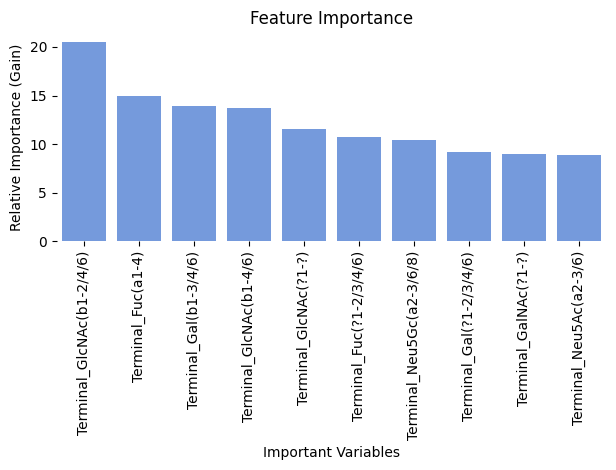

In [ ]:
analyze_ml_model(model_ft)

In [ ]:
show_doc(get_mismatch)

---

### get_mismatch

```python

def get_mismatch(
    model:XGBModel, # trained ML model from train_ml_model
    X_test:DataFrame, # motif dataframe for validation
    y_test:list, # test labels
    n:int=10, # number of returned misclassifications
)->list: # misclassifications and predicted probabilities


```

*analyzes misclassifications of trained machine learning model*

In [ ]:
get_mismatch(model_ft, X_test, y_test)

[('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol', 0.6580290198326111),
 ('Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  0.8202570676803589),
 ('Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)Glc-ol', 0.7799018025398254),
 ('Neu5Ac(a2-3)Gal(b1-3/4)GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  0.870390772819519),
 ('Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc-ol', 0.7616670727729797),
 ('Fuc(a1-3/4)[Gal(b1-3/4)]GlcNAc(b1-2)[Fuc(a1-3/4)[Gal(b1-3/4)]GlcNAc(b1-4)]Man(a1-3)[Fuc(a1-3/4)[Gal(b1-3/4)]GlcNAc(b1-2)[Fuc(a1-3/4)[Gal(b1-3/4)]GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  0.7801192998886108),
 ('Gal(b1-3/4)GlcNAc(b1-2/4)[GlcNAc(b1-2/4)]Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  0.7964416742324829),
 ('{Gal(b1-3/4)GlcNAc(b1-3)}{Gal(b1-3/4)GlcNAc(b1-3)}{Gal(b1-3/4)GlcNAc(b1-3)}{Gal(b1-3/4)GlcNAc(b1-3)}{Fuc(a1-2/3/4)}Fuc(a1-3)[Gal(b1-4)]GlcN

## models
>describes some examples for machine learning architectures applicable to glycans. The main portal is prep_models which allows users to setup (trained) models by their string names

In [ ]:
show_doc(SweetNet)

---

### SweetNet

```python

def SweetNet(
    lib_size:int, # number of unique tokens for graph nodes
    num_classes:int=1, # number of output classes (>1 for multilabel)
    hidden_dim:int=128, # dimension of hidden layers
)->None:


```

*Base class for all neural network modules.*

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self) -> None:
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool

In [ ]:
show_doc(LectinOracle)

---

### LectinOracle

```python

def LectinOracle(
    input_size_glyco:int, # number of unique tokens for graph nodes
    hidden_size:int=128, # layer size for graph convolutions
    num_classes:int=1, # number of output classes (>1 for multilabel)
    data_min:float=-11.355, # minimum observed value in training data
    data_max:float=23.892, # maximum observed value in training data
    input_size_prot:int=960, # dimensionality of protein representations
)->None:


```

*Base class for all neural network modules.*

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self) -> None:
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool

In [ ]:
show_doc(LectinOracle_flex)

---

### LectinOracle_flex

```python

def LectinOracle_flex(
    input_size_glyco:int, # number of unique tokens for graph nodes
    hidden_size:int=128, # layer size for graph convolutions
    num_classes:int=1, # number of output classes (>1 for multilabel)
    data_min:float=-11.355, # minimum observed value in training data
    data_max:float=23.892, # maximum observed value in training data
    input_size_prot:int=1000, # maximum protein sequence length for padding/cutting
)->None:


```

*Base class for all neural network modules.*

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self) -> None:
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool

In [ ]:
show_doc(NSequonPred)

---

### NSequonPred

```python

def NSequonPred(
    
)->None:


```

*Base class for all neural network modules.*

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self) -> None:
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool

In [ ]:
show_doc(init_weights)

---

### init_weights

```python

def init_weights(
    model:Module, # neural network for analyzing glycans
    mode:str='sparse', # initialization algorithm: 'sparse', 'kaiming', 'xavier'
    sparsity:float=0.1, # proportion of sparsity after initialization
)->None:


```

*initializes linear layers of PyTorch model with a weight initialization*

In [ ]:
show_doc(prep_model)

---

### prep_model

```python

def prep_model(
    model_type:Literal, # type of model to create
    num_classes:int, # number of unique classes for classification
    libr:dict[str, int] | None=None, # dictionary of form glycoletter:index
    trained:bool=False, # whether to use pretrained model
    hidden_dim:int=128, # hidden dimension for the model (SweetNet only)
)->Module: # initialized PyTorch model


```

*wrapper to instantiate model, initialize it, and put it on the GPU*

## processing
>contains helper functions to prepare glycan data for model training

In [ ]:
show_doc(dataset_to_graphs)

---

### dataset_to_graphs

```python

def dataset_to_graphs(
    glycan_list:list, # list of IUPAC-condensed glycan sequences
    labels:list, # list of labels
    libr:dict[str, int] | None=None, # dictionary of glycoletter:index
    label_type:dtype=torch.int64, # tensor type for label
)->list: # list of node/edge/label data tuples


```

*wrapper function to convert a whole list of glycans into a graph dataset*

In [ ]:
dataset_to_graphs(["Neu5Ac(a2-3)Gal(b1-4)Glc",
                  "Fuc(a1-2)Gal(b1-3)GalNAc"], [1, 0])

[Data(edge_index=[2, 4], labels=[5], string_labels=[5], num_nodes=5, y=1),
 Data(edge_index=[2, 4], labels=[5], string_labels=[5], num_nodes=5, y=0)]

In [ ]:
show_doc(dataset_to_dataloader)

---

### dataset_to_dataloader

```python

def dataset_to_dataloader(
    glycan_list:list, # list of IUPAC-condensed glycans
    labels:list, # list of labels
    libr:dict[str, int] | None=None, # dictionary of glycoletter:index
    batch_size:int=32, # samples per batch
    shuffle:bool=True, # shuffle samples in dataloader
    drop_last:bool=False, # drop last batch
    extra_feature:list[float] | None=None, # additional input features
    label_type:dtype=torch.int64, # tensor type for label
    augment_prob:float=0.0, # probability of data augmentation
    generalization_prob:float=0.2, # probability of wildcarding
)->DataLoader: # dataloader for training


```

*wrapper function to convert glycans and labels to a torch_geometric DataLoader*

In [ ]:
next(iter(dataset_to_dataloader(["Neu5Ac(a2-3)Gal(b1-4)Glc",
                                 "Fuc(a1-2)Gal(b1-3)GalNAc"], [1, 0])))

DataBatch(edge_index=[2, 8], labels=[10], string_labels=[2], num_nodes=10, y=[2], batch=[10], ptr=[3])

In [ ]:
show_doc(split_data_to_train)

---

### split_data_to_train

```python

def split_data_to_train(
    glycan_list_train:list, # training glycans
    glycan_list_val:list, # validation glycans
    labels_train:list, # training labels
    labels_val:list, # validation labels
    libr:dict[str, int] | None=None, # dictionary of glycoletter:index
    batch_size:int=32, # samples per batch
    drop_last:bool=False, # drop last batch
    extra_feature_train:list[float] | None=None, # additional training features
    extra_feature_val:list[float] | None=None, # additional validation features
    label_type:dtype=torch.int64, # tensor type for label
    augment_prob:float=0.0, # probability of data augmentation
    generalization_prob:float=0.2, # probability of wildcarding
)->dict: # dictionary of train/val dataloaders


```

*wrapper function to convert split training/test data into dictionary of dataloaders*

In [ ]:
split_data_to_train(["Neu5Ac(a2-3)Gal(b1-4)Glc", "Fuc(a1-2)Gal(b1-3)GalNAc"],
                    ["Neu5Ac(a2-6)Gal(b1-4)Glc", "Fuc(a1-2)Gal(a1-3)GalNAc"],
                    [1, 0], [0,1])

{'train': <torch_geometric.loader.dataloader.DataLoader>,
 'val': <torch_geometric.loader.dataloader.DataLoader>}

## inference
<a class="anchor" id="inference"></a>
>can be used to analyze trained models, make predictions, or obtain glycan representations

In [ ]:
show_doc(glycans_to_emb)

---

### glycans_to_emb

```python

def glycans_to_emb(
    glycans:list, # list of glycans in IUPAC-condensed
    model:Module, # trained graph neural network for analyzing glycans
    libr:dict[str, int] | None=None, # dictionary of form glycoletter:index
    batch_size:int=32, # batch size used during training
    rep:bool=True, # True returns representations, False returns predicted labels
    class_list:list[str] | None=None, # list of unique classes to map predictions
    multilabel:bool=False, # whether to output predictions for a multilabel-task
)->pandas.core.frame.DataFrame | list[str]: # dataframe of representations or list of predictions


```

*Returns a dataframe of learned representations for a list of glycans*

In [ ]:
show_doc(get_lectin_preds)

---

### get_lectin_preds

```python

def get_lectin_preds(
    prot:str, # protein amino acid sequence
    glycans:list, # list of glycans in IUPAC-condensed
    model:Module, # trained LectinOracle-type model
    prot_dic:dict[str, list[float]] | None=None, # dict of protein sequence:ESMC representation
    background_correction:bool=False, # whether to correct predictions for background
    correction_df:pandas.core.frame.DataFrame | None=None, # background prediction for glycans
    batch_size:int=128, # batch size used during training
    libr:dict[str, int] | None=None, # dict of glycoletter:index
    sort:bool=True, # whether to sort prediction results descendingly
    flex:bool=False, # LectinOracle (False) or LectinOracle_flex (True)
)->DataFrame: # glycan sequences and predicted binding


```

*Wrapper that uses LectinOracle-type model for predicting binding of protein to glycans*

In [ ]:
show_doc(get_Nsequon_preds)

---

### get_Nsequon_preds

```python

def get_Nsequon_preds(
    prots:list, # 20 AA + N + 20 AA sequences; replace missing with 'z'
    model:Module, # trained NSequonPred-type model
    prot_dic:dict, # dict of protein sequence:ESM1b representation
)->DataFrame: # protein sequences and predicted likelihood


```

*Predicts whether an N-sequon will be glycosylated*

In [ ]:
show_doc(get_esmc_representations)

---

### get_esmc_representations

```python

def get_esmc_representations(
    prots:list, # list of protein sequences to convert
    model:Module, # trained ESMC model
)->dict: # dict of protein sequence:ESMC-300M representation


```

*Retrieves ESMC-300M representations of protein for using them as input for LectinOracle*

In order to run `get_esmc_representations`, you first have to run this snippet:

`!pip install fair-esm`
`from esm.models.esmc import ESMC`
`model = ESMC.from_pretrained("esmc_300m").to(device)`

## train_test_split
>contains various data split functions to get appropriate training and test sets

In [ ]:
show_doc(hierarchy_filter)

---

### hierarchy_filter

```python

def hierarchy_filter(
    df_in:DataFrame, # dataframe of glycan sequences and taxonomic labels
    rank:str='Domain', # taxonomic rank to filter
    min_seq:int=5, # minimum glycans per class
    wildcard_seed:bool=False, # seed wildcard glycoletters
    wildcard_list:list[str] | None=None, # glycoletters for wildcard
    wildcard_name:str | None=None, # wildcard name in IUPAC
    r:float=0.1, # replacement rate
    col:str='glycan', # column name for glycans
)->tuple: # train/val splits and mappings


```

*stratified data split in train/test at the taxonomic level, removing duplicate glycans and infrequent classes*

In [ ]:
train_x, val_x, train_y, val_y, id_val, class_list, class_converter = hierarchy_filter(df_species,
                                                                                       rank = 'Kingdom')
print(train_x[:10])

['Rha(a1-3)DDManHep(b1-4)Rha(a1-3)DDManHep(b1-4)Rha(a1-3)GalNAc', 'Man(a1-6)Glc(b1-4)[Glc(b1-3)][Glc(b1-6)]Glc(a1-5)Kdo', 'Man2Ac(a1-3)Gal(b1-4)DDManHep(a1-5)Kdo4P8P(a2-6)GlcN4P(b1-6)GlcN1P', 'HexNAc(?1-?)[Fuc(a1-?)]HexNAc(?1-?)Gal(b1-3/4)GlcNAc(b1-6)[Fuc(a1-?)HexNAc(?1-3/4)Gal(b1-3)]GalNAc', '[Rha(a1-4)GlcA(b1-2)Rha(a1-2)]Rha(a1-3)Rha(a1-2)Rha(a1-3)GlcNAc(b1-3)Rha', 'Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'IdoA(a1-3)GalNAc4S6S', 'GlcNAcOPCho(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Glc(b1-3)[Man(a1-2)]Man(b1-3)Man(b1-3)Rha(a1-3)Glc', 'Neu5Ac(a2-3)[GalNAc(b1-4)]Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3/6)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3/6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc']


In [ ]:
show_doc(general_split)

---

### general_split

```python

def general_split(
    glycans:list, # list of IUPAC-condensed glycans
    labels:list, # list of prediction labels
    test_size:float=0.2, # size of test set
)->tuple: # train/test splits


```

*splits glycans and labels into train / test sets*

In [ ]:
train_x, val_x, train_y, val_y = general_split(df_species.glycan.values.tolist(),
                                              df_species.Species.values.tolist())
print(train_x[:10])

['Neu5Ac(a2-3/6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3/6)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3/6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', '[Man(a1-2)Man(a1-2)Man(a1-6)Man(a1-3)Man(a1-2)Man(a1-2)]Man(a1-6)Man(a1-6)[Man(a1-3)Man(a1-2)Man(a1-2)]Man(a1-3)[Man(a1-3)Man(a1-2)Man(a1-6)[Man(a1-3)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)[Gal(a1-3)Gal(b1-4)GlcNAc(b1-4/6)]Man(a1-3/6)[Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3/6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Qui3NSerAc(b1-3)Ribf(b1-4)Gal(b1-3)GlcNAc(a1-4)Qui3NSerAc', 'Gal(a1-4)Neu5Ac(a2-6)Gal', 'GlcA(?1-?)GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)GalNAc(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'LDManHep(a1-7)LDManHepOP(a1-3)[DDManHepOP(a1-2)DDManHep(a1-4)]LDManHep(a1-5)Kdo', 'Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Gal(b1-3/4)GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Fuc(a1-2)Gal(b1-

In [ ]:
show_doc(prepare_multilabel)

---

### prepare_multilabel

```python

def prepare_multilabel(
    df:DataFrame, # dataframe with one glycan-association per row
    rank:str='Species', # label column to use
    glycan_col:str='glycan', # column with glycan sequences
)->tuple: # unique glycans and their label vectors


```

*converts a one row per glycan-species/tissue/disease association file to a format of one glycan - all associations*

In [ ]:
glycans, labels = prepare_multilabel(df_species[df_species.Order == 'Carnivora'])
print(glycans[50])
print(labels[50])

Fuc(a1-2)Gal(b1-4)Gal(b1-4)Glc-ol
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()